In [1]:
import pandas as pd
import numpy as np

In [2]:
rel_cols = ['id',
 'Q_id',
 'Q',
 'tipo_preg',
 'A',
 'label',
 'beto-label',
 'eq',
 'mispelling',
 'is correct?',
 'is correct the answer?']
beto_comp = pd.read_excel("D:\github\coherence-prediction/beto_label_v7_comp_v2.xlsx")[rel_cols].set_index("id")

In [3]:
beto_comp

,Q_id,Q,tipo_preg,A,label,beto-label,eq,mispelling,is correct?,is correct the answer?
id,,,,,,,,,,
48412,2724,¿Qué otras características son a tu juicio rel...,5,Nose,1,1,1,1.0,NaN,NaN
48413,2724,¿Qué otras características son a tu juicio rel...,5,I,1,1,1,1.0,NaN,NaN
48458,2727,¿Qué otras características son a tu juicio imp...,5,Y,1,1,1,1.0,NaN,NaN
48516,2728,¿Fue muy difícil realizar la actividad de clas...,0,Bien porque fue fasil porque lo abia aprendid...,0,0,5,1.0,NaN,NaN
48519,2728,¿Fue muy difícil realizar la actividad de clas...,0,No porqué trabajado todas en equipo\n,0,0,5,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95322,5099,Crea un problema de división con los números 5...,5,tengo 56 autos y lo quiero repartir en mis 7 ...,0,0,5,1.0,NaN,NaN
95636,5094,Alejandra tiene una caja de 4x3x2 cm llena de ...,2,Yo lo que ise fue v=4•3•2 =12 12 •2=24cm³,0,1,25,1.0,NaN,NaN
95736,5126,¿Dónde se “mueve” la célula en nuestro modelo ...,5,El número mayor que está alrededor de la célul...,0,0,5,0.0,NaN,NaN


In [4]:
from sklearn.metrics import precision_recall_fscore_support

In [5]:
precision_recall_fscore_support(beto_comp[beto_comp["mispelling"] == 0]["label"], beto_comp[beto_comp["mispelling"] == 0]["beto-label"])

(array([0.94940476, 0.7012987 ]),
 array([0.93274854, 0.76056338]),
 array([0.94100295, 0.72972973]),
 array([342,  71], dtype=int64))

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
sns.set(font_scale=1) # for label size

Text(0.5, 0.98, 'Q3 report (GPT-3)')

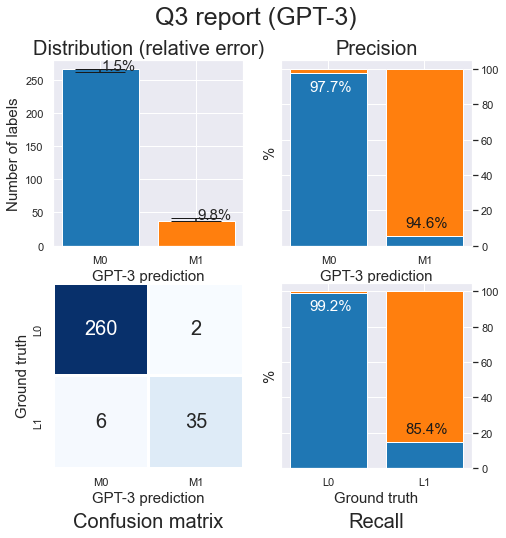

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(5*1.5, 5*1.5))

Q = 3
cfm_raw = beto_comp[beto_comp["tipo_preg"] == Q]["eq"].value_counts()
cfm = np.zeros((2, 2))
cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
###
yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
for i in range(2):
    yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
    ax[0,0].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                     xy =(i, 0),
                     xytext =(i+0.015, yi), size=15)
ax[0,0].set_title("Distribution (relative error)", size=20)
ax[0,0].set_ylabel("Number of labels", size=15)
ax[0, 0].set_xlabel("GPT-3 prediction", size=15);
###
pr = 100*df_cfm/df_cfm.sum(axis=0)
ax[0, 1].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
ax[0, 1].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[0,1].set_title("Precision", size=20)
ax[0, 1].set_ylabel("%", size=15)
ax[0, 1].set_xlabel("GPT-3 prediction", size=15);
ax[0,1].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
ax[0,1].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
# ax[0, 1].yaxis.set_label_position("right")
ax[0, 1].yaxis.tick_right()
###
rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
ax[1, 1].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
ax[1, 1].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[1, 1].set_title("Recall", size=20, y=-0.35)
ax[1, 1].set_ylabel("%", size=15)
# ax[1, 1].yaxis.set_label_position("right")
ax[1, 1].set_xlabel("Ground truth", size=15);
ax[1,1].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
ax[1,1].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
ax[1, 1].yaxis.tick_right()
###
sns.heatmap(df_cfm, ax=ax[1, 0], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
ax[1, 0].set_ylabel("Ground truth", size=15);
ax[1, 0].set_xlabel("GPT-3 prediction", size=15);
ax[1, 0].set_title("Confusion matrix", size=20, y=-0.35);
plt.suptitle(f"Q{Q} report (GPT-3)", size=25)

In [1]:
p, r = 94.6, 85.4

2 * p * r / (p + r)

89.76488888888889

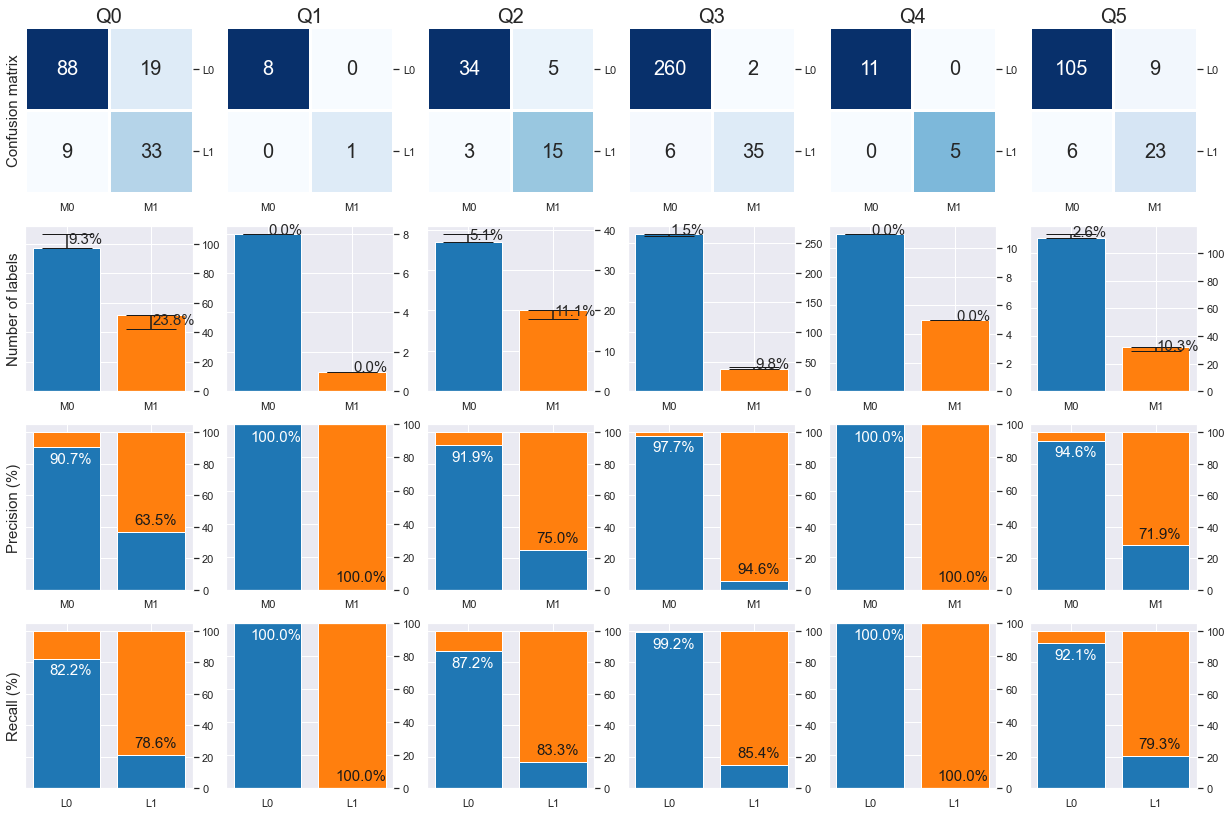

In [10]:
fig, ax = plt.subplots(4, 6, figsize=(6*5*.7, 4*5*.7))
for ix in range(6):
    Q = ix
    cfm_raw = beto_comp[gpt_comp["tipo_preg"] == Q]["eq"].value_counts()
    cfm = np.zeros((2, 2))
    cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
    cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
    cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
    cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
    df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
    ###
    yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
    ax[1, ix].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
    for i in range(2):
        yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
        ax[1,ix].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                         xy =(i, 0),
                         xytext =(i+0.015, yi), size=15)
#     ax[1,ix].set_title("Distribution (relative error)", size=20)
    if ix==0:
        ax[1,ix].set_ylabel("Number of labels", size=15)
#     ax[1,ix].set_xlabel("GPT-3 prediction", size=15);
    ax[1, ix].yaxis.tick_right()
    ###
    pr = 100*df_cfm/df_cfm.sum(axis=0)
    ax[2, ix].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
    ax[2, ix].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[2, ix].set_title("Precision", size=20)
    if ix == 0:
        ax[2, ix].set_ylabel("Precision (%)", size=15)
#     ax[2, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[2, ix].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
    ax[2, ix].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
    # ax[0, 1].yaxis.set_label_position("right")
    ax[2, ix].yaxis.tick_right()
    ###
    rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
    ax[3, ix].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
    ax[3, ix].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
#     ax[3, ix].set_title("Recall", size=20, y=-0.35)
    if ix == 0:
        ax[3, ix].set_ylabel("Recall (%)", size=15)
    # ax[1, 1].yaxis.set_label_position("right")
#     ax[3, ix].set_xlabel("Ground truth", size=15);
    ax[3, ix].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
    ax[3, ix].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
    ax[3, ix].yaxis.tick_right()
    ###
    sns.heatmap(df_cfm, ax=ax[0, ix], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
    if ix==0:
        ax[0, ix].set_ylabel("Confusion matrix", size=15);
#     ax[0, ix].set_xlabel("GPT-3 prediction", size=15);
    ax[0, ix].set_title(f"Q{Q}", size=20);
    ax[0, ix].yaxis.tick_right()
    plt.setp(ax[0, ix].get_yticklabels(), rotation=0)
#     plt.suptitle(f"GPT-3", size=25, y=1)